In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
dt = pd.read_csv(r'/content/LungCancerDataset.csv')

In [3]:
dt.info()
dt.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   GENDER               309 non-null    object
 1   AGE                  309 non-null    int64 
 2   SMOKING              309 non-null    int64 
 3   YELLOW_FINGERS       309 non-null    int64 
 4   ANXIETY              309 non-null    int64 
 5   CHRONIC DISEASE      309 non-null    int64 
 6   ALCOHOL CONSUMING    309 non-null    int64 
 7   COUGHING             309 non-null    int64 
 8   SHORTNESS OF BREATH  309 non-null    int64 
 9   CHEST PAIN           309 non-null    int64 
 10  LUNG_CANCER          309 non-null    object
dtypes: int64(9), object(2)
memory usage: 26.7+ KB


,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,2,2,2,2,YES
1,M,74,2,1,1,2,1,1,2,2,YES
2,F,59,1,1,1,1,1,2,2,2,NO
3,M,63,2,2,2,1,2,1,1,2,NO
4,F,63,1,2,1,1,1,2,2,1,NO


In [4]:
dt.isnull().any()

GENDER                 False
AGE                    False
SMOKING                False
YELLOW_FINGERS         False
ANXIETY                False
CHRONIC DISEASE        False
ALCOHOL CONSUMING      False
COUGHING               False
SHORTNESS OF BREATH    False
CHEST PAIN             False
LUNG_CANCER            False
dtype: bool

In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [6]:
dt['GENDER'] = le.fit_transform(dt['GENDER'])
dt['LUNG_CANCER'] = le.fit_transform(dt['LUNG_CANCER'])

<Axes: >

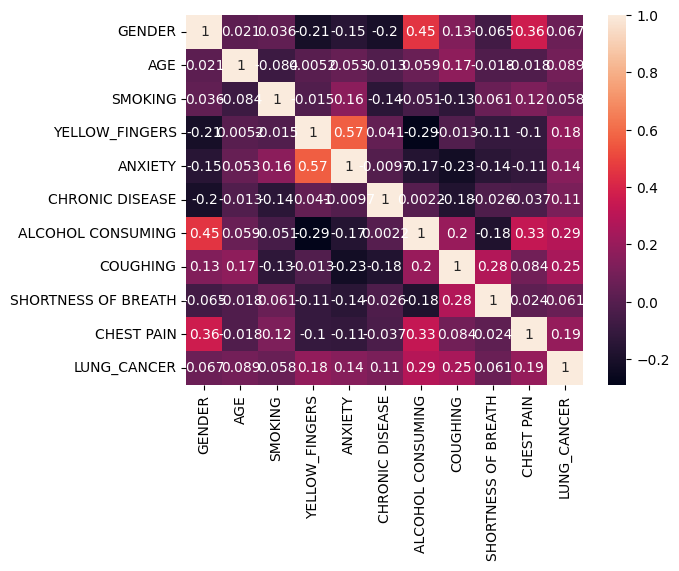

In [7]:
sns.heatmap(dt.corr(),annot= True)


In [8]:
dt.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,2,2,2,2,1
1,1,74,2,1,1,2,1,1,2,2,1
2,0,59,1,1,1,1,1,2,2,2,0
3,1,63,2,2,2,1,2,1,1,2,0
4,0,63,1,2,1,1,1,2,2,1,0


In [9]:
dt.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,CHRONIC DISEASE,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.021306,0.036277,-0.212959,-0.152127,-0.204606,0.454268,0.133303,-0.064911,0.362958,0.067254
AGE,0.021306,1.000000,-0.084475,0.005205,0.053170,-0.012642,0.058985,0.169950,-0.017513,-0.018104,0.089465
SMOKING,0.036277,-0.084475,1.000000,-0.014585,0.160267,-0.141522,-0.050623,-0.129471,0.061264,0.120117,0.058179
YELLOW_FINGERS,-0.212959,0.005205,-0.014585,1.000000,0.565829,0.041122,-0.289025,-0.012640,-0.105944,-0.104829,0.181339
ANXIETY,-0.152127,0.053170,0.160267,0.565829,1.000000,-0.009678,-0.165750,-0.225644,-0.144077,-0.113634,0.144947
CHRONIC DISEASE,-0.204606,-0.012642,-0.141522,0.041122,-0.009678,1.000000,0.002150,-0.175287,-0.026459,-0.036938,0.110891
ALCOHOL CONSUMING,0.454268,0.058985,-0.050623,-0.289025,-0.165750,0.002150,1.000000,0.202720,-0.179416,0.331226,0.288533
COUGHING,0.133303,0.169950,-0.129471,-0.012640,-0.225644,-0.175287,0.202720,1.000000,0.277385,0.083958,0.248570
SHORTNESS OF BREATH,-0.064911,-0.017513,0.061264,-0.105944,-0.144077,-0.026459,-0.179416,0.277385,1.000000,0.024256,0.060738
CHEST PAIN,0.362958,-0.018104,0.120117,-0.104829,-0.113634,-0.036938,0.331226,0.083958,0.024256,1.000000,0.190451


In [10]:
dt.drop('GENDER',axis=1,inplace=True)


In [11]:
x = dt.drop('LUNG_CANCER', axis = 1)
y = pd.DataFrame(dt['LUNG_CANCER'])


<Axes: >

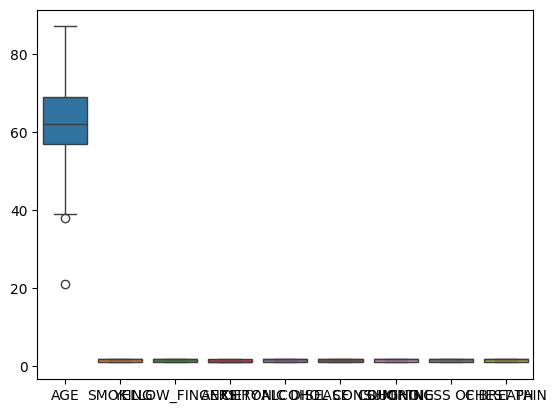

In [12]:
sns.boxplot(data = x)

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(x)

StandardScaler()

<ipython-input-14-f8a7609bb571>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)


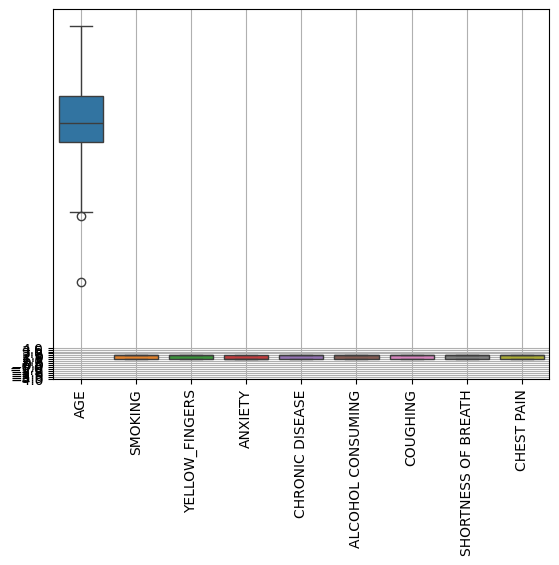

In [14]:
import matplotlib.pyplot as plt
plot = sns.boxplot(x)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
plt.yticks([-4,-3.5,-3,-2.5,-2,-1.5,-1,-0.5,0,0.5,1,1.5,2,2.5,3,3.5,4])
plt.grid()
plt.show()

In [15]:
ind = x[(x['AGE']<-3.0)]
l = ind.index.tolist()
len(l)

0

In [16]:
outlier_data = dt.iloc[l]

In [17]:
lx = x.columns.tolist()
ly = y.columns.tolist()
x = sc.transform(x)
x = pd.DataFrame(x, columns = lx)
y = y.values.tolist() # to maintain same indexing
y = pd.DataFrame(y, columns = ly)

In [18]:
def get_outlier_indices(x, columns):
  outlier_indices = []
  for column in columns:
    Q1 = x[column].quantile(0.25)
    Q3 = x[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_indices.extend(x[((x[column] < lower_bound) | (x[column] > upper_bound))].index.
                           tolist())
  return outlier_indices

outlier_indices = get_outlier_indices(x, x.columns)
print(outlier_indices)

[22, 238]


In [19]:
outlier_indices = list(set(outlier_indices))

In [20]:
x.drop(index = outlier_indices, inplace = True)
y.drop(index = outlier_indices, inplace = True)

<Axes: >

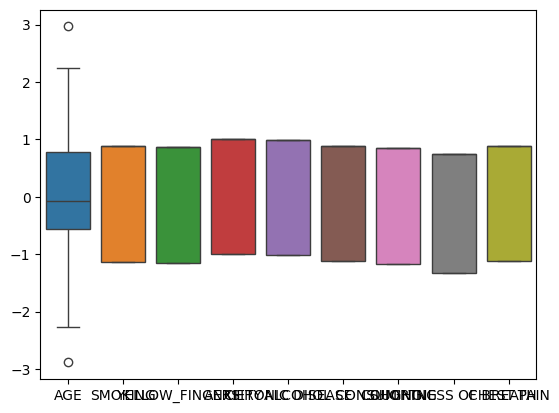

In [21]:
sns.boxplot(x)

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

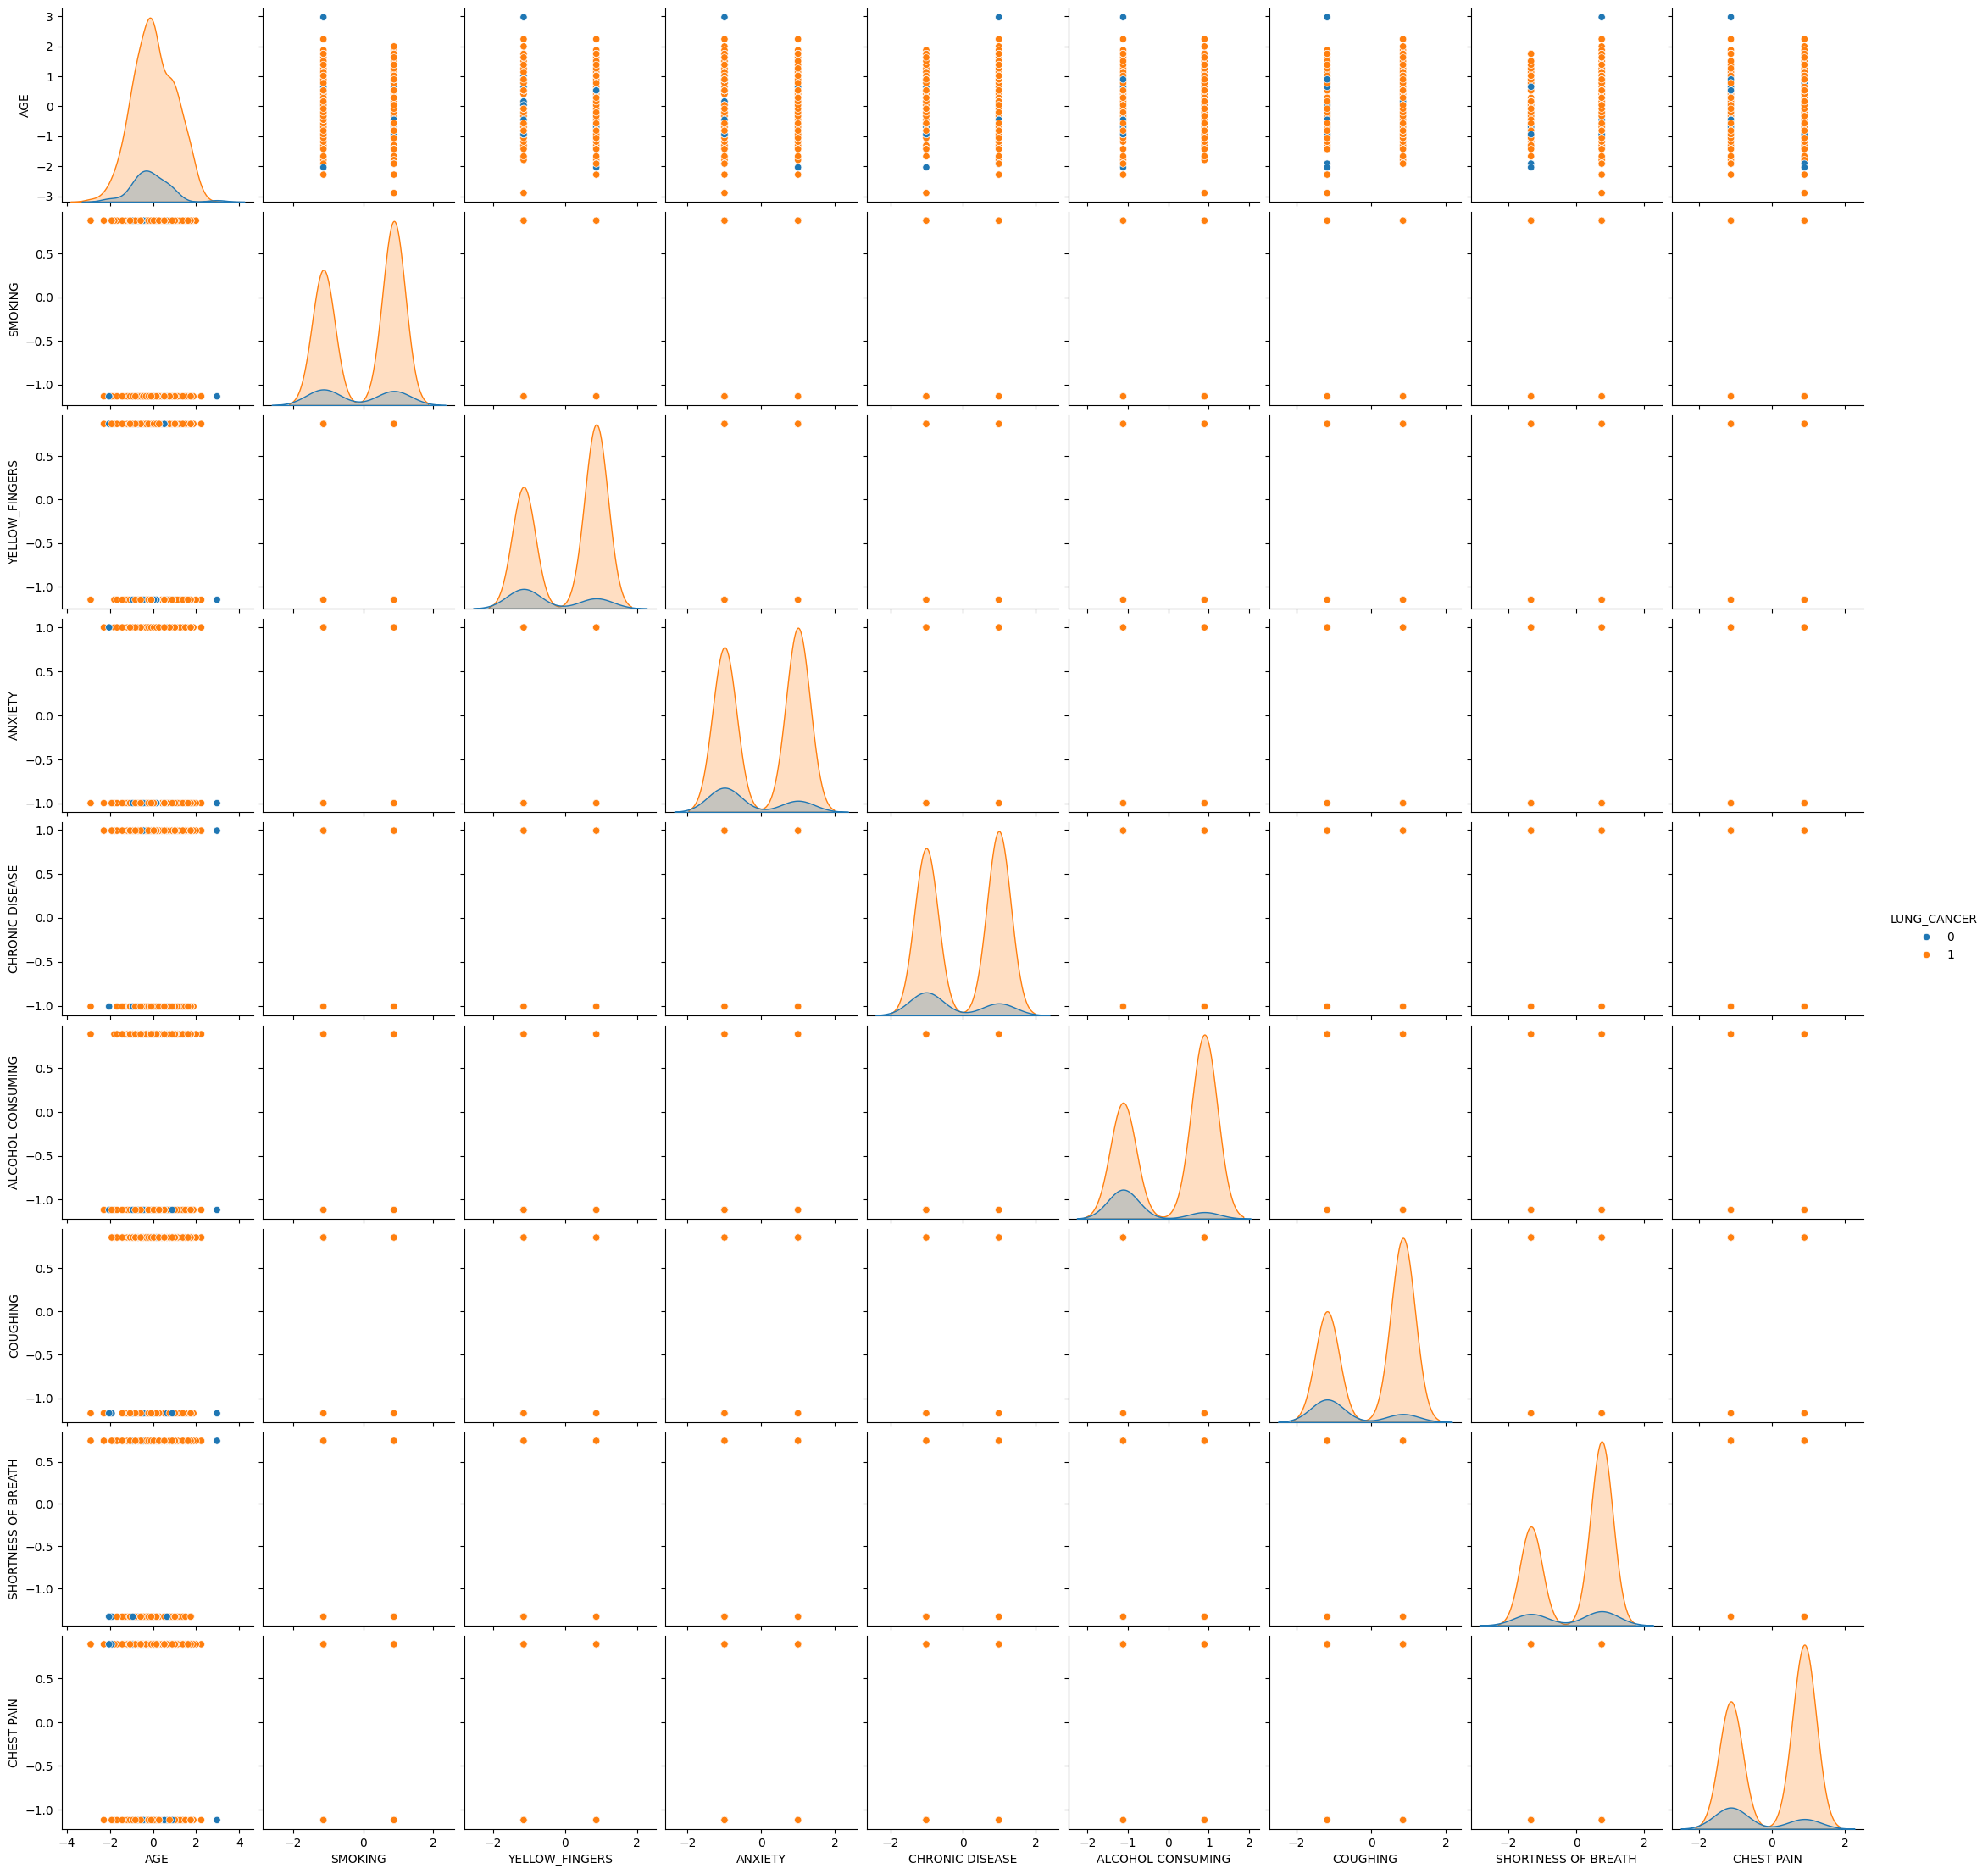

In [23]:
merg = pd.concat([x, y], axis = 1)
sns.pairplot(merg, hue = 'LUNG_CANCER')

In [32]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred = dtc.predict(x_test)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
print(accuracy_score(y_test,y_pred))
cm=confusion_matrix(y_test,y_pred)
print(cm)

0.8709677419354839
[[ 2  6]
 [ 2 52]]


In [35]:
TN = cm [0,0]
FP = cm [0,1]
TP = cm [1,1]
FN = cm [1,0]


In [38]:
sensitivity = TP/(TP+FP)
specificity = TN/(TN+FP)

In [39]:
sensitivity

0.896551724137931

In [40]:
specificity

0.25

In [41]:
import pickle as pkl
pkl.dump(dtc,open('model.pkl','wb'))